In [1]:
import pandas as pd 
import seaborn as sns
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix,roc_curve,roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB  


df=pd.read_csv('/content/Customer_Behaviour.csv')

**EDA**

In [2]:
df.shape

(400, 5)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [4]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


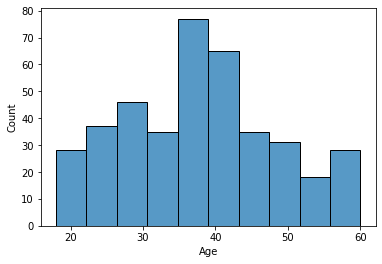

In [5]:
sns.histplot(df['Age'])

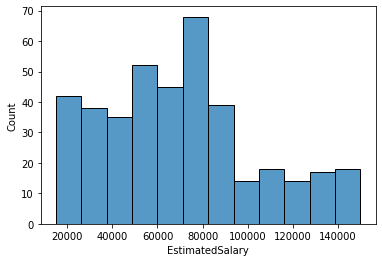

In [6]:
sns.histplot(df['EstimatedSalary'])

**Data** **Preprocessing**

In [7]:
df=pd.get_dummies(df,columns=['Gender'])

In [8]:
df.head(2)

,User ID,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,15624510,19,19000,0,0,1
1,15810944,35,20000,0,0,1


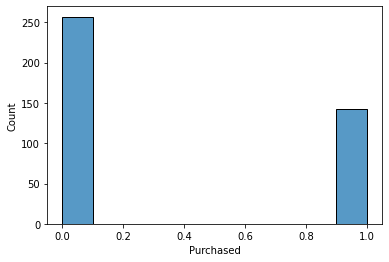

In [9]:
sns.histplot(df['Purchased'])

In [10]:
y=df['Purchased']
X=df.drop(['User ID','Purchased'],axis=1)

Counter({0: 257, 1: 257})


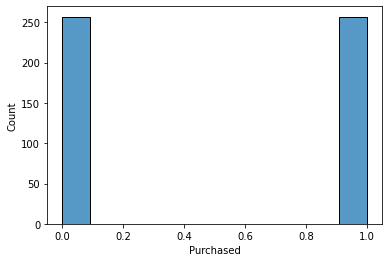

In [11]:

oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
#summarize the new class distribution
counter = Counter(y)
print(counter)
sns.histplot(y)

**Modelling**

**K**-**Nearest** **Neighbor**

In [12]:
Xtrain, Xtest, ytrain, ytest = tts (X,y,test_size=0.20,random_state=1)

In [13]:
clf=KNeighborsClassifier(n_neighbors=3)
clf.fit(Xtrain,ytrain)
y_pred=clf.predict(Xtest)

In [14]:
cmKNN=confusion_matrix(y_pred,ytest)
print(cmKNN)

[[34 10]
 [ 7 52]]


In [15]:
accuracy_score(y_pred,ytest)

0.8349514563106796

In [16]:
print(classification_report(y_pred,ytest))

              precision    recall  f1-score   support

           0       0.83      0.77      0.80        44
           1       0.84      0.88      0.86        59

    accuracy                           0.83       103
   macro avg       0.83      0.83      0.83       103
weighted avg       0.83      0.83      0.83       103



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


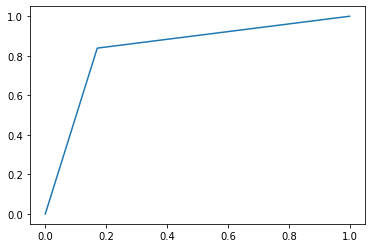

In [17]:
# roc curve for tpr = fpr 
fpr,tpr,_= roc_curve(ytest, y_pred, pos_label=1)
sns.lineplot(fpr,tpr)

In [18]:
auc_score=roc_auc_score(ytest,y_pred)
print(auc_score)

0.8339889850511409


**Naive** **Bayes**

In [19]:
#Fitting Naive Bayes to the Training set  
classifier = GaussianNB()  
classifier.fit(Xtrain, ytrain) 

GaussianNB()

In [20]:
y_pred = classifier.predict(Xtest)  

In [21]:
cm = confusion_matrix(ytest, y_pred)  
cm

array([[38,  3],
       [ 7, 55]])

In [22]:
accuracy_score(y_pred,ytest)

0.9029126213592233

In [23]:
print(classification_report(y_pred,ytest))

              precision    recall  f1-score   support

           0       0.93      0.84      0.88        45
           1       0.89      0.95      0.92        58

    accuracy                           0.90       103
   macro avg       0.91      0.90      0.90       103
weighted avg       0.90      0.90      0.90       103



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


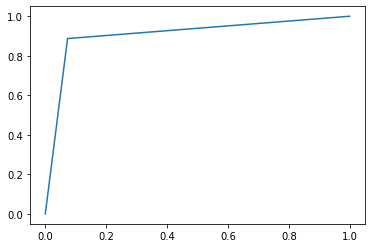

In [24]:
fpr,tpr,_= roc_curve(ytest, y_pred, pos_label=1)
sns.lineplot(fpr,tpr)

In [25]:
auc_score=roc_auc_score(ytest,y_pred)
print(auc_score)

0.9069630212431158


For KNN we get accuracy score of 83% but for Naive Bayes we get accuracy of 90%. 